# **1. Data Preprocessing and Normalization**

In [897]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [898]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [899]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Startup_Scoring_Dataset.csv')

In [900]:
data.head(10)

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,7,789,66299,6091495,4183839,263247468
1,S002,4,939,34866,9106842,666326,172927107
2,S003,8,42,73630,8817088,649150,313090455
3,S004,5,57,93657,6374167,20153173,305887183
4,S005,7,512,61187,841971,118834,84815222
5,S006,10,416,95939,551157,48939582,307433345
6,S007,3,583,68940,4428727,22725756,123865200
7,S008,7,737,54484,4174499,46422165,378403327
8,S009,8,814,51105,5996594,4422201,58978079
9,S010,5,108,46676,5156799,1079600,290161754


In [901]:
data.tail(10)

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
90,S091,3,368,72794,6562440,5084921,32558781
91,S092,1,719,43116,6149628,27810313,338382319
92,S093,5,465,7500,6605968,43351876,72784216
93,S094,10,420,42742,2749015,46787763,310860757
94,S095,7,658,15251,9724733,3693305,214591500
95,S096,10,327,51507,8887590,49655442,98146618
96,S097,9,686,66790,1222622,13470137,439431826
97,S098,7,234,4599,2553771,4466271,70995760
98,S099,9,828,6395,3227825,34907127,239717603
99,S100,8,243,59140,1046161,10495300,56547339


In [902]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   startup_id               100 non-null    object
 1   team_experience          100 non-null    int64 
 2   market_size_million_usd  100 non-null    int64 
 3   monthly_active_users     100 non-null    int64 
 4   monthly_burn_rate_inr    100 non-null    int64 
 5   funds_raised_inr         100 non-null    int64 
 6   valuation_inr            100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [903]:
data.describe()

,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.910000,548.500000,52002.670000,5.271927e+06,2.256808e+07,2.316022e+08
std,2.871296,270.025046,29193.444748,2.801648e+06,1.633037e+07,1.388826e+08
min,1.000000,14.000000,954.000000,1.663810e+05,1.188340e+05,1.007064e+07
25%,3.000000,346.750000,26729.250000,2.928578e+06,5.996659e+06,1.121723e+08
50%,6.000000,578.000000,52472.500000,5.277296e+06,2.214305e+07,2.437296e+08
75%,8.000000,755.000000,74684.750000,7.694987e+06,3.549996e+07,3.198588e+08
max,10.000000,996.000000,98606.000000,9.931393e+06,4.965544e+07,4.978948e+08


In [904]:
data.isnull().sum()

,0
startup_id,0
team_experience,0
market_size_million_usd,0
monthly_active_users,0
monthly_burn_rate_inr,0
funds_raised_inr,0
valuation_inr,0


In [905]:
#higher burn rate = Worse
#so we will flip the values like higher burn rate to lower and vice versa.
max_burn_rate = data['monthly_burn_rate_inr'].max()
data['monthly_burn_rate_inr']=max_burn_rate-data['monthly_burn_rate_inr']

In [906]:
# Identify numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Displaying the normalized data
data.head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,0.666667,0.789206,0.669162,0.393230,0.082061,0.518992
1,S002,0.333333,0.941955,0.347274,0.084439,0.011052,0.333843
2,S003,0.777778,0.028513,0.744235,0.114112,0.010706,0.621166
3,S004,0.444444,0.043788,0.949320,0.364283,0.404435,0.606400
4,S005,0.666667,0.507128,0.616813,0.930815,0.000000,0.153220


# **2. Defining a Custom Scoring Formula**

In [907]:
# Define the weighted scoring logic
weights = {
    'team_experience': 15,
    'market_size_million_usd': 20,
    'monthly_active_users': 20,
    'monthly_burn_rate_inr': 10,
    'funds_raised_inr': 15,
    'valuation_inr': 20
}

data['composite_score'] = sum(data[col] * weight for col, weight in weights.items())
data.head()


,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr,composite_score
0,S001,0.666667,0.789206,0.669162,0.393230,0.082061,0.518992,54.710404
1,S002,0.333333,0.941955,0.347274,0.084439,0.011052,0.333843,38.471612
2,S003,0.777778,0.028513,0.744235,0.114112,0.010706,0.621166,40.846648
3,S004,0.444444,0.043788,0.949320,0.364283,0.404435,0.606400,48.366183
4,S005,0.666667,0.507128,0.616813,0.930815,0.000000,0.153220,44.851381


# **3. Ranking & Interpretation**

In [908]:
#assigning ranks based on composite score
data['rank'] = data['composite_score'].rank(ascending=False)

In [909]:
#sorting the composite score in descending order
data_sorted = data.sort_values(by='composite_score', ascending=False)


In [910]:
#displaying the top 10 rows
data_sorted[['startup_id','composite_score','rank']].head(10)

,startup_id,composite_score,rank
5,S006,79.221734,1.0
76,S077,76.685841,2.0
44,S045,75.746522,3.0
32,S033,75.659642,4.0
12,S013,72.754247,5.0
28,S029,72.294562,6.0
96,S097,71.067801,7.0
7,S008,70.705888,8.0
11,S012,70.001390,9.0
42,S043,68.074973,10.0


In [911]:
#displaying the bottom 10 rows
data_sorted[['startup_id','composite_score','rank']].tail(10)

,startup_id,composite_score,rank
16,S017,32.513343,91.0
73,S074,31.689550,92.0
78,S079,31.644930,93.0
90,S091,31.132346,94.0
50,S051,31.121304,95.0
83,S084,29.387857,96.0
57,S058,28.555900,97.0
97,S098,26.596602,98.0
22,S023,26.302911,99.0
54,S055,19.167376,100.0


In [939]:
# Displaying highest score
print("Startup with Rank 1:")
display(data_sorted[data_sorted['rank'] == 1])

Startup with Rank 1:


,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr,composite_score,rank
5,S006,1.0,0.409369,0.972689,0.960596,0.985549,0.609569,79.221734,1.0


*   **Highest Score Startup_Id:** S006

      Startup S006 ranked #1 with a composite score of 79.22 due to its high team experience (1.0), very high active users (0.97), and low burn rate (flipped score: 0.96) — indicating efficient spending. It also secured strong funding (0.99) and has a moderate valuation (0.61). Despite an average market size (0.41), its strong performance in the most weighted areas made it the top performer.

In [940]:
# Displaying the lowest composite score
print("\nStartup with Rank 100:")
display(data_sorted[data_sorted['rank'] == 100])


Startup with Rank 100:


,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr,composite_score,rank
54,S055,0.777778,0.157841,0.020041,0.297178,0.018661,0.034569,19.167376,100.0


*   **Lowest Score Startup_Id:** S055

      Startup S055 ranked #100 with a low composite score of 19.17 due to weak performance across several critical factors. It had very low active users (0.02), minimal funding raised (0.02), a very low valuation (0.03) and market size (0.16) was also small, limiting growth potential. It had a high burn rate (flipped score: 0.30), reflecting poor cost efficiency. While the team experience (0.78) was fairly decent, it wasn’t enough to offset weaknesses in other key areas, leading to its bottom rank.

# **4. Visualization**

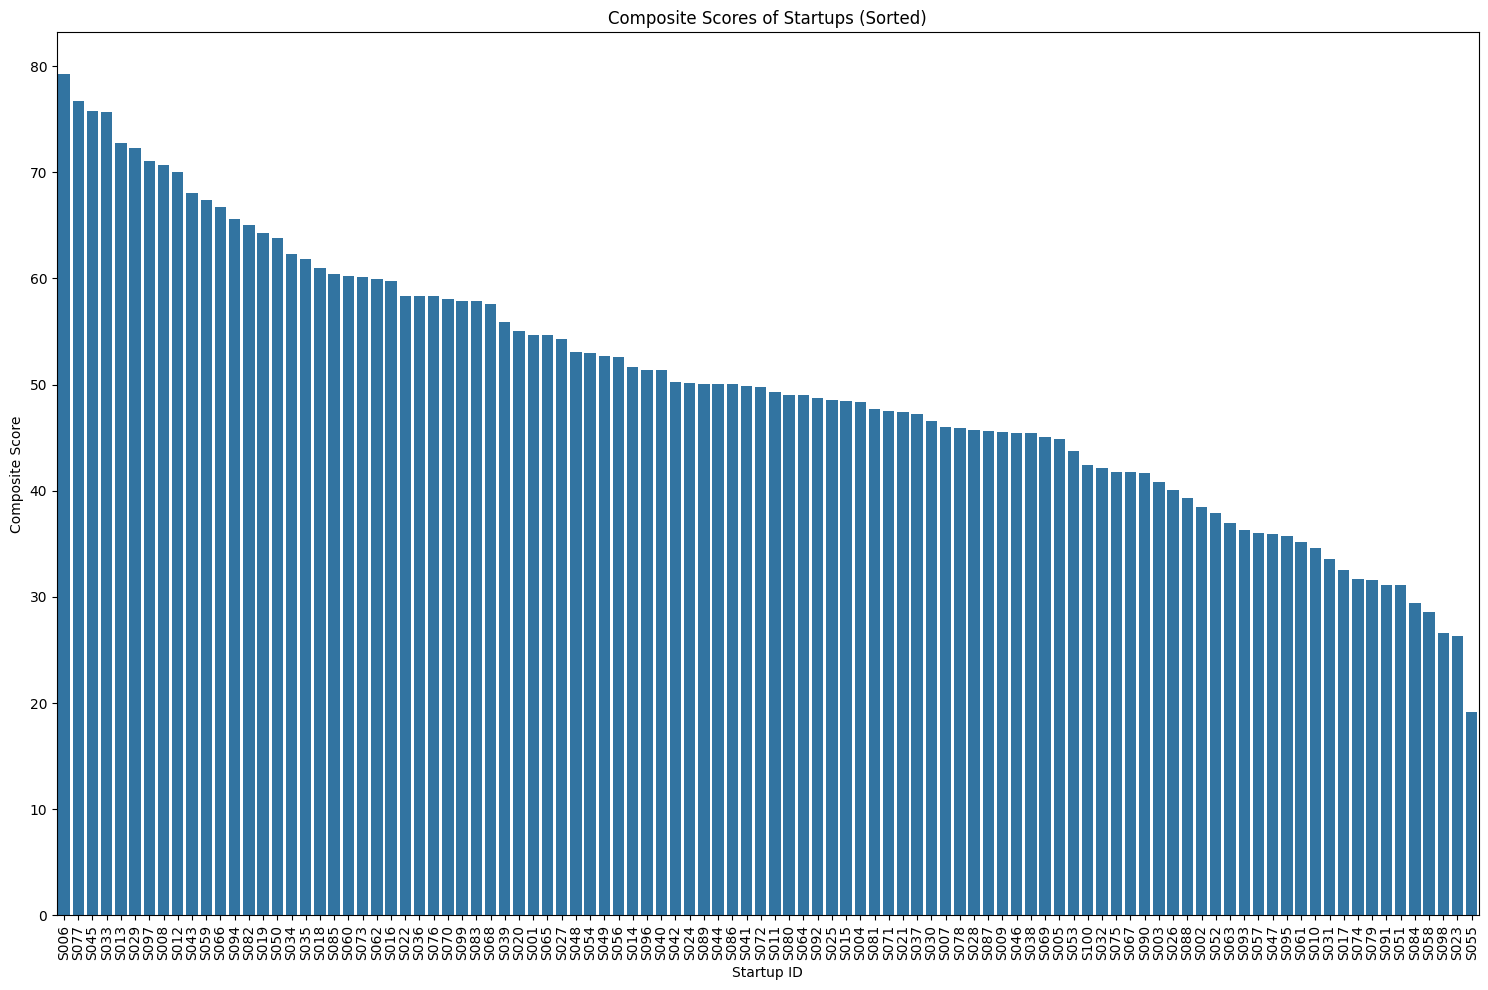

In [912]:
from matplotlib import pyplot as plt
import seaborn as sns

# Create a bar chart of the composite scores
plt.figure(figsize=(15,10))
sns.barplot(x='startup_id', y='composite_score', data=data_sorted)
plt.xticks(rotation=90)
plt.xlabel('Startup ID')
plt.ylabel('Composite Score')
plt.title('Composite Scores of Startups (Sorted)')
plt.tight_layout()
plt.show()

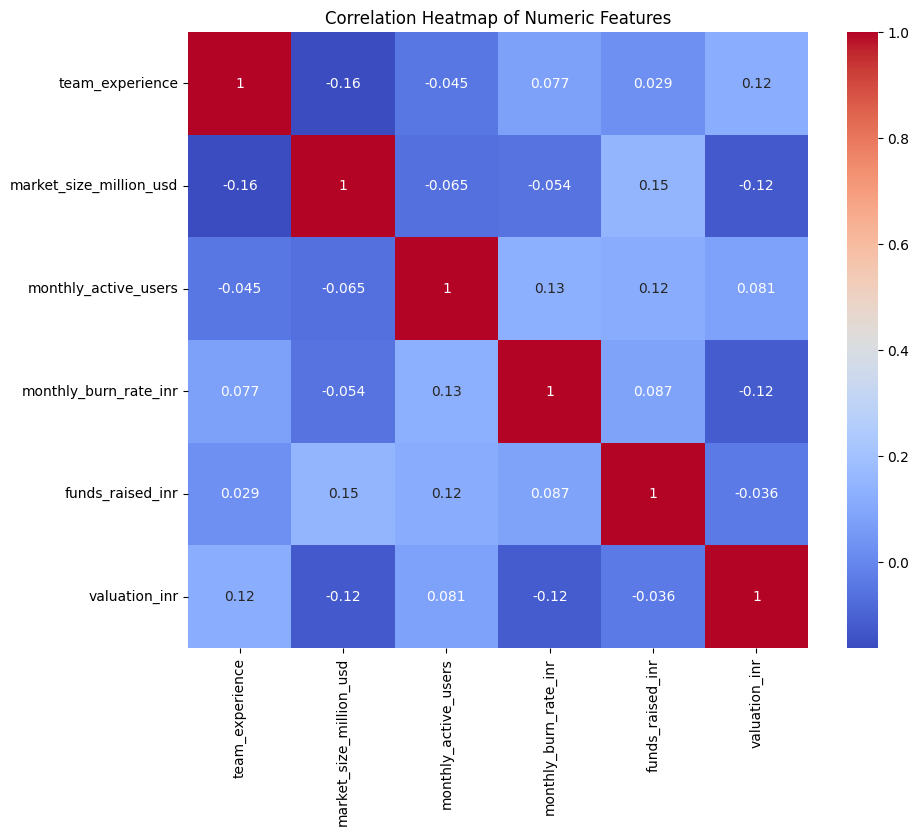

In [913]:
# Identifying numeric columns
numeric_data = data.select_dtypes(include=['number']).drop(columns=['composite_score', 'rank'])

# correlation heatmap between input features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

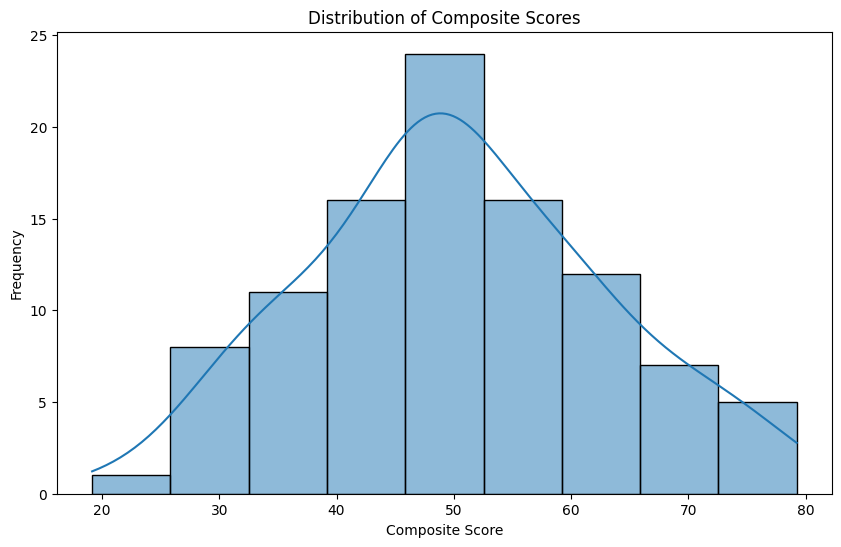

In [914]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the composite score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='composite_score', kde=True) # Passing the DataFrame to data and specifying the column with x
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.title('Distribution of Composite Scores')
plt.show()

In [915]:
data

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr,composite_score,rank
0,S001,0.666667,0.789206,0.669162,0.393230,0.082061,0.518992,54.710404,34.0
1,S002,0.333333,0.941955,0.347274,0.084439,0.011052,0.333843,38.471612,81.0
2,S003,0.777778,0.028513,0.744235,0.114112,0.010706,0.621166,40.846648,78.0
3,S004,0.444444,0.043788,0.949320,0.364283,0.404435,0.606400,48.366183,57.0
4,S005,0.666667,0.507128,0.616813,0.930815,0.000000,0.153220,44.851381,71.0
...,...,...,...,...,...,...,...,...,...
95,S096,1.000000,0.318737,0.517685,0.106892,1.000000,0.180549,51.408344,42.0
96,S097,0.888889,0.684318,0.674190,0.891834,0.269524,0.880156,71.067801,7.0
97,S098,0.666667,0.224033,0.037326,0.755516,0.087762,0.124892,26.596602,98.0
98,S099,0.888889,0.828921,0.055718,0.686488,0.702274,0.470758,57.840264,29.0


# **Data Splitting**

In [916]:
X = data.drop(columns=['startup_id', 'composite_score', 'rank'])
y = data['composite_score']

In [919]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **ML Models**

In [924]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [925]:
models={
    'Linear_Regression' : LinearRegression(),
    'Ridge' : Ridge(alpha=0.1),
    'Lasso' : Lasso(alpha=0.025),
    'Random_Forest' : RandomForestRegressor(max_depth=5, n_estimators=250, random_state=42),
    'XGBoost' : XGBRegressor(learning_rate=0.2, max_depth=3, n_estimators=200, random_state=42)
}

In [926]:
results={}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mse=mean_squared_error(y_test, y_pred)
  rmse=np.sqrt(mse)
  mae=mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  results[model_name] = {
      'MSE' : mse,
      'RMSE' : rmse,
      'MAE' : mae,
      'R2' : r2
  }

  print(f"{model_name} Results:")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")
  print(f"R2: {r2}")
  print()


Linear_Regression Results:
MSE: 2.164634323926456e-28
RMSE: 1.4712696299205174e-14
MAE: 1.1191048088221578e-14
R2: 1.0

Ridge Results:
MSE: 0.07903498614726912
RMSE: 0.2811316171249138
MAE: 0.22602254800497618
R2: 0.9996369968069696

Lasso Results:
MSE: 0.08463547634622458
RMSE: 0.29092177014830733
MAE: 0.23454778864395537
R2: 0.9996112740742424

Random_Forest Results:
MSE: 55.257486689821484
RMSE: 7.433537965855928
MAE: 5.685948953817087
R2: 0.7462055086608774

XGBoost Results:
MSE: 32.114991995689536
RMSE: 5.667009087313125
MAE: 3.986450017942512
R2: 0.8524976696160997



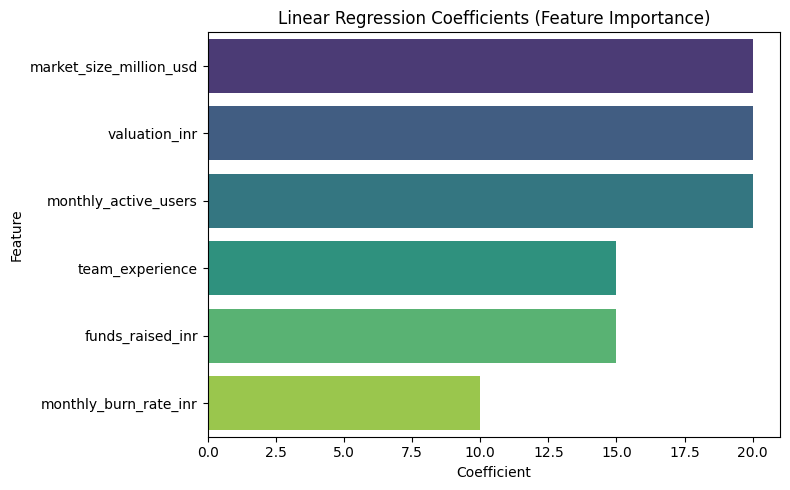

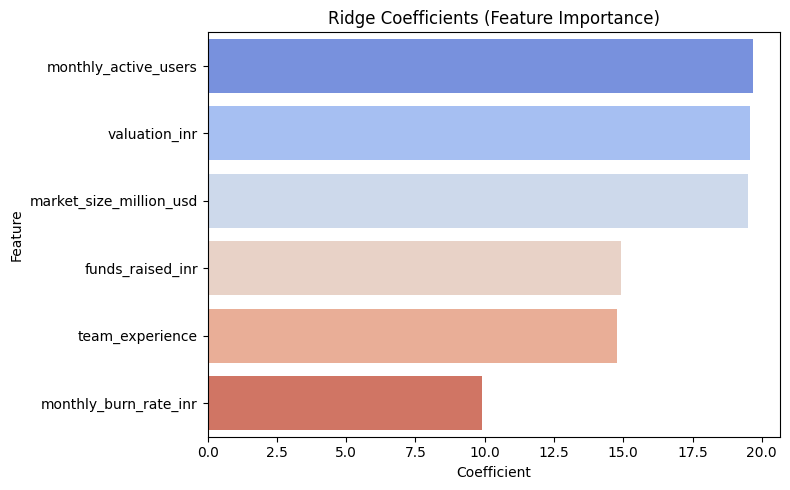

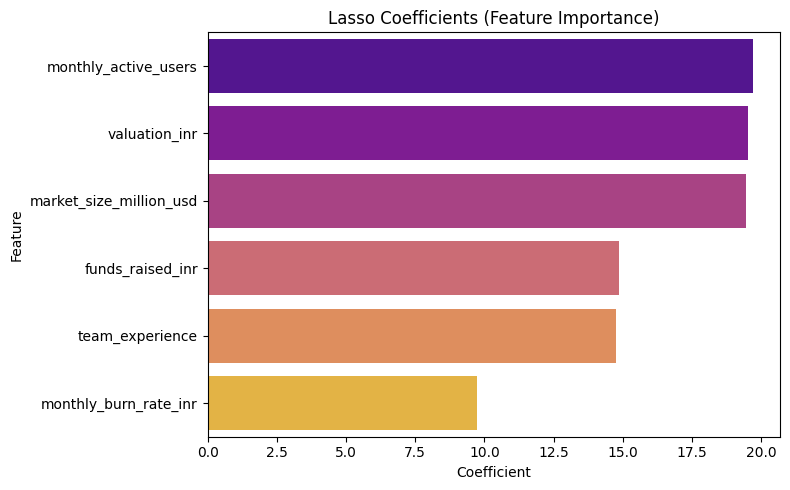

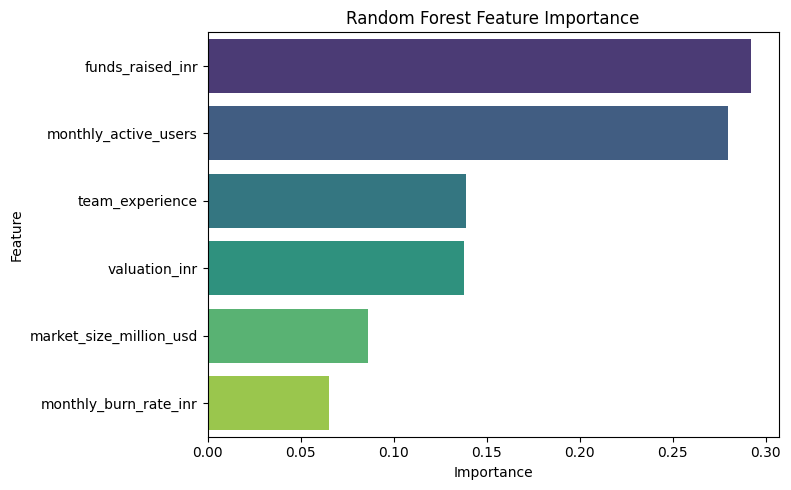

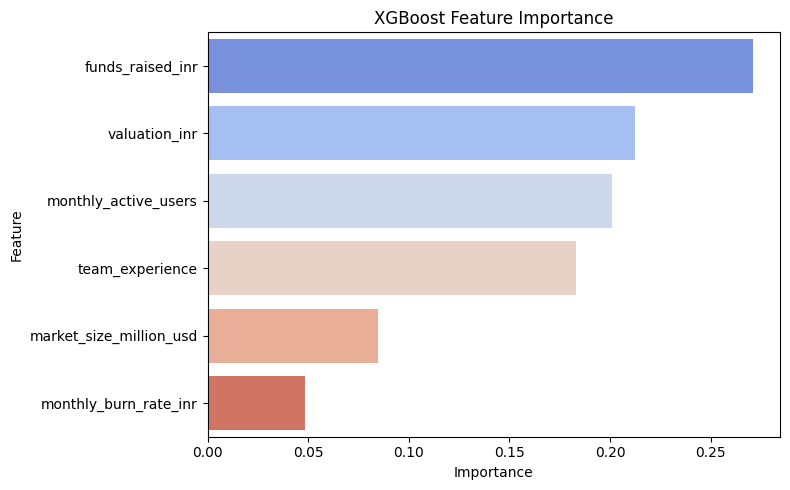

In [935]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


linear_coefs = models['Linear_Regression'].coef_
ridge_coefs = models['Ridge'].coef_
lasso_coefs = models['Lasso'].coef_
rf_importances = models['Random_Forest'].feature_importances_
xgb_importances = models['XGBoost'].feature_importances_

# Create DataFrames for plotting
linear_coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_coefs
}).sort_values(by='Coefficient', ascending=False)

ridge_coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_coefs
}).sort_values(by='Coefficient', ascending=False)

lasso_coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_coefs
}).sort_values(by='Coefficient', ascending=False)

rf_feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

xgb_feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)


# Plot Linear Regression Coefficients
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=linear_coef_df, palette='viridis')
plt.title('Linear Regression Coefficients (Feature Importance)')
plt.tight_layout()
plt.show()
print()

# Plot Ridge Coefficients
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=ridge_coef_df, palette='coolwarm')
plt.title('Ridge Coefficients (Feature Importance)')
plt.tight_layout()
plt.show()
print()

# Plot Lasso Coefficients
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coef_df, palette='plasma')
plt.title('Lasso Coefficients (Feature Importance)')
plt.tight_layout()
plt.show()
print()

# Plot Random forest features
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=rf_feat_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()
print()

# Plot XGBoost features
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=xgb_feat_df, palette='coolwarm')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

# **Neural Network**

In [941]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.002), loss='mse', metrics=['mae'])
# Add early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [931]:
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stop], verbose=1)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - loss: 2811.1750 - mae: 51.4929 - val_loss: 2056.3379 - val_mae: 44.8281
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 2819.4807 - mae: 51.5069 - val_loss: 2045.5923 - val_mae: 44.7092
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2867.5808 - mae: 52.1188 - val_loss: 2034.5913 - val_mae: 44.5870
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2791.4060 - mae: 51.2254 - val_loss: 2023.0741 - val_mae: 44.4588
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2738.4084 - mae: 50.6206 - val_loss: 2010.7891 - val_mae: 44.3217
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2760.6526 - mae: 51.0679 - val_loss: 1997.5533 - val_mae: 44.1736
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2633.4675 - mae: 49.9479 - val_loss: 1983.0129 - val_mae: 44.0108
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2794.5959 - mae: 51.3599 - val_loss: 1967.1727 - val_mae: 43.8331
Epoch 9

In [932]:
y_pred = model.predict(X_test).flatten()

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
MSE: 28.23682427661392
R² Score: 0.8703098732205735


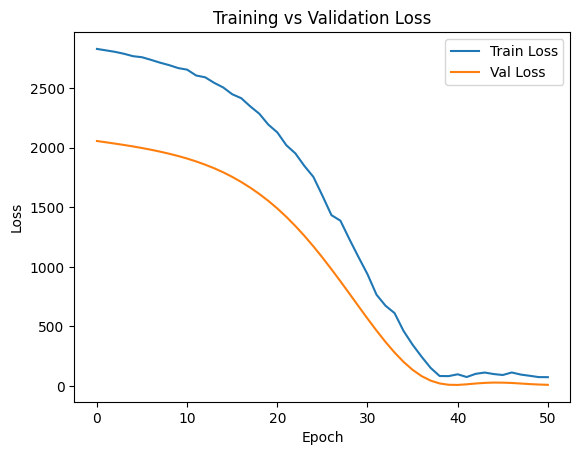

In [933]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
